1. Find the number of distinct bookings, sessions, and searches from the given datasets

In [6]:
#import library
import pandas as pd
import numpy as np
#import csv file 
data = pd.read_csv('Bookings.csv')
data_sessions = pd.read_csv('Sessions.csv')

#Count the unique booking IDs
unique_bookings = data ['booking_id'].nunique()
print(f"Unique Booking IDs: {unique_bookings}")

#Count the unique sessions IDs
unique_sessions = data_sessions ['session_id'].nunique()
print(f"Unique Session IDs: {unique_sessions}")

#Count the unique session IDs
unique_searches = data_sessions['search_id'].nunique()
print(f"Unique Search IDs: {unique_searches}") 


Unique Booking IDs: 339
Unique Session IDs: 331
Unique Search IDs: 1360


2. How many sessions have more than one booking?

In [7]:
# Group by session ID and count unique bookings
session_booking_counts = data_sessions.groupby('session_id')['booking_id'].nunique()

# Filter sessions with more than one booking
sessions_with_multiple_bookings = session_booking_counts[session_booking_counts > 1]
print(sessions_with_multiple_bookings)

# Get the total count
total_sessions = len(sessions_with_multiple_bookings)

print(f"Total sessions with more than one booking: {total_sessions}")

session_id
session_134    2
session_154    2
session_196    2
session_231    2
session_27     2
session_290    2
session_298    2
session_324    2
session_50     2
session_76     2
Name: booking_id, dtype: int64
Total sessions with more than one booking: 10


3. Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week ?

Day with highest bookings: Thursday


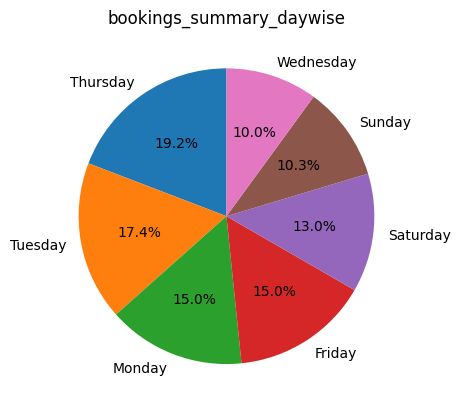

In [9]:
import matplotlib.pyplot as plt
new_data = pd.read_csv('Bookings.csv')
bookings_df1 = new_data
bookings_df1.booking_time = pd.to_datetime(bookings_df1.booking_time)
bookings_df1['booking_day']=bookings_df1.booking_time.apply(lambda x:x.day_name())
booking_day_summary = bookings_df1.booking_day.value_counts()
booking_day_summary = booking_day_summary.to_csv("booking_day_summary.csv")
bkg_day=pd.read_csv('booking_day_summary.csv')
weekday=bkg_day['booking_day']
print(f"Day with highest bookings: {weekday[0]}")
weekday_summary=bkg_day['count']
plt.pie(weekday_summary,labels=weekday,startangle=90,autopct='%.1f%%')
plt.title("bookings_summary_daywise")
plt.show()

4. For each of the service names, display the total number of bookings and the total Gross Booking Value in INR.

In [10]:
# Group by service name and count bookings
booking_counts = data.groupby('service_name')['booking_id'].count()

# Calculate the total Gross Booking Value (sum of INR_Amount)
gross_booking_value = data.groupby('service_name')['INR_Amount'].sum()

# Combine the results into a DataFrame
result_df = pd.DataFrame({
    'Total Bookings': booking_counts,
    'Total Gross Booking Value (INR)': gross_booking_value
})

# Display the result
print(result_df)

              Total Bookings  Total Gross Booking Value (INR)
service_name                                                 
GOIBIBO                  186                       5897637.97
MMT                       48                        665669.08
YATRA                    105                       3378702.13


5. For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

In [11]:
# Group by departure city and count departures
departure_counts = data.groupby('from_city')['booking_id'].count()

# Filter cities with at least 5 departures
popular_departures = departure_counts[departure_counts >= 5]

# Sort by departure count in ascending order
sorted_departures = popular_departures.sort_values(ascending=False)

# Get the top 3 departure cities
top_3_cities = sorted_departures.index[:3]

print(f"Top 3 departure cities for advance bookings: {', '.join(top_3_cities)}")

Top 3 departure cities for advance bookings: Gurgaon, Mumbai, Delhi


7. Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings dataset, have the maximum correlation?

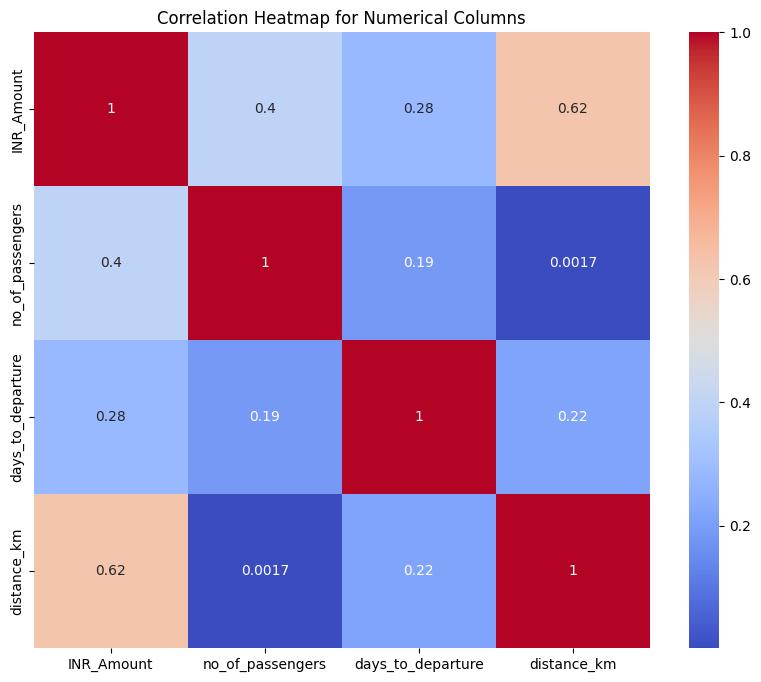

The pair of numerical columns with the maximum correlation is: ('INR_Amount', 'INR_Amount')


In [12]:
import seaborn as sns
# Select only numerical columns for correlation
numerical_columns = data.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()

# Find the pair of columns with maximum correlation
max_corr_pair = correlation_matrix.unstack().idxmax()

print(f"The pair of numerical columns with the maximum correlation is: {max_corr_pair}")

8. For each service, which is the most used device type for making bookings on the platform?

In [13]:
# Group by service name and count device types
device_counts = data.groupby('service_name')['device_type_used'].value_counts()

# Get the most used device type for each service
most_used_devices = device_counts.groupby('service_name').idxmax()

print("Most used device type for each service:")
for service, device in most_used_devices.items():
    print(f"{service}: {device[1]}")

Most used device type for each service:
GOIBIBO: IOS
MMT: Desktop
YATRA: Desktop


9. Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type.

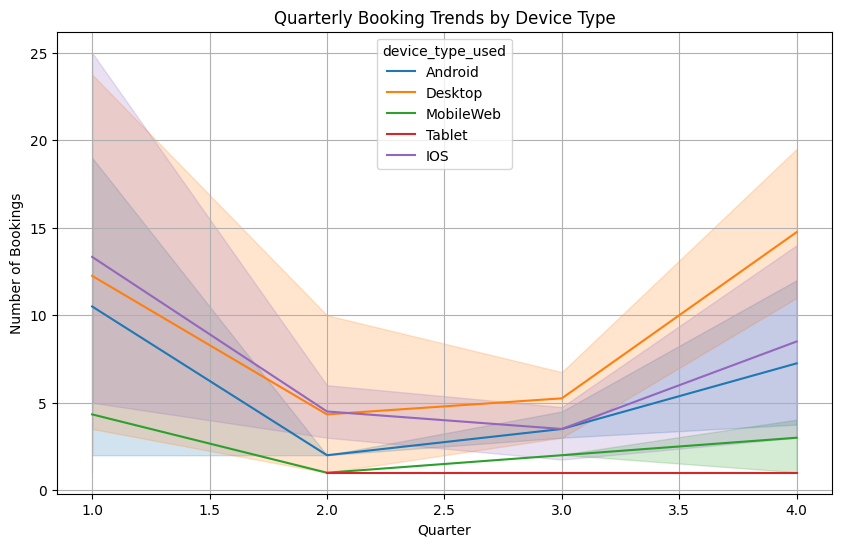

In [14]:
# Convert booking_time to datetime
data['booking_time'] = pd.to_datetime(data['booking_time'])

# Extract year and quarter
data['year'] = data['booking_time'].dt.year
data['quarter'] = data['booking_time'].dt.quarter

# Group by year, quarter, and device type
booking_counts = data.groupby(['year', 'quarter', 'device_type_used']).size().reset_index(name='count')

# Create time series plots
plt.figure(figsize=(10, 6))
sns.lineplot(x='quarter', y='count', hue='device_type_used', data=booking_counts)
plt.xlabel('Quarter')
plt.ylabel('Number of Bookings')
plt.title('Quarterly Booking Trends by Device Type')
plt.grid(True)
plt.show()

10. Consider the following example:12 customers performed a total of 100 searches but only a few of them performed 10 bookings in total. Searches = 100 bookings =10 customers= 12 The overall booking to search ratio , Ober , is 10/100 = 0.1 Using the above information/context ,answer the following: •What is the average oBSR for each month of the year? •What is the average oBSR for each day of the week? •Plot a time series of oBSR on all the given dates.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the sessions.csv file (replace 'C:\\sessions.csv' with the actual file path)
data = pd.read_csv('Sessions.csv')

# Convert the 'search_time' column to datetime
data['search_time'] = pd.to_datetime(data['search_time'], format='mixed')

# Extract year and month
data['year'] = data['search_time'].dt.year
data['month'] = data['search_time'].dt.month

# Calculate the total searches and bookings
total_searches = data['search_id'].nunique()
total_bookings = data['booking_id'].nunique()

# Calculate the overall booking to search ratio (oBSR)
oBSR = total_bookings / total_searches

print(f"Overall booking to search ratio (oBSR): {oBSR:.2f}")
# Calculate the average oBSR for each month
average_oBSR_monthly = data.groupby(['year', 'month'])['booking_id'].nunique() / data.groupby(['year', 'month'])['search_id'].nunique()

print("Average oBSR for each month:")
print(average_oBSR_monthly)

# Calculate the average oBSR for each day of the week
data['day_of_week'] = data['search_time'].dt.dayofweek
average_oBSR_daily = data.groupby('day_of_week')['booking_id'].nunique() / data.groupby('day_of_week')['search_id'].nunique()

print("Average oBSR for each day of the week:")
print(average_oBSR_daily)

Overall booking to search ratio (oBSR): 0.25
Average oBSR for each month:
year  month
2018  9        0.387097
      10       0.095238
      11       0.243902
      12       0.193548
2019  1        0.333333
      6        1.000000
      7        0.217391
      8        0.285714
      9        0.304348
      10       0.214286
      11       0.285714
      12       0.219298
2020  1        0.226027
      2        0.306452
      3        0.300000
      5        0.111111
      6        0.333333
      7        0.100000
      8        0.666667
      9        0.375000
      10       0.545455
      11       0.407407
      12       0.666667
2021  1        0.571429
      2        0.363636
      3        0.312500
      4        0.258065
      5        0.500000
      6        0.428571
      7        0.117647
      8        0.210526
      9        0.521739
      10       0.300000
      11       0.147059
      12       0.300000
2022  1        0.350000
      2        0.275862
      3        0.179487
  

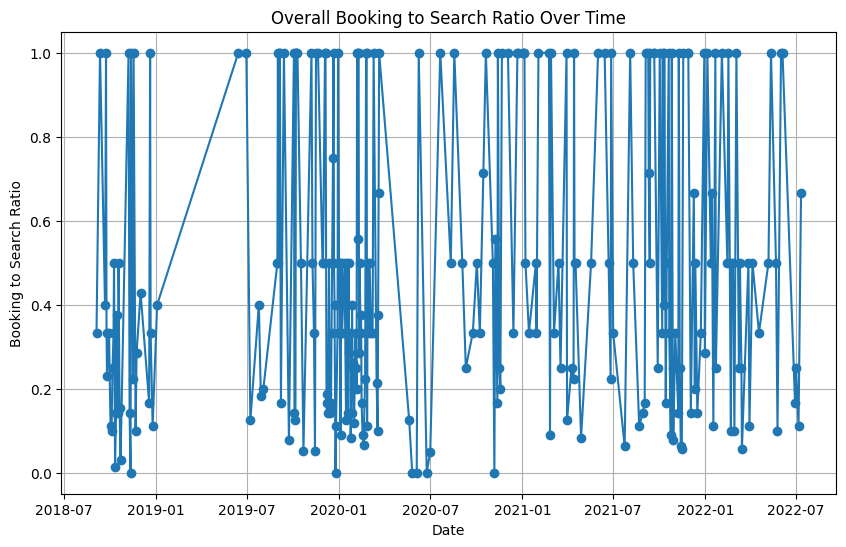

In [18]:
# Load your sessions.csv data into a DataFrame (replace 'your_file.csv' with the actual file path)
df = pd.read_csv('Sessions.csv')

# Convert the 'search_time' column to datetime
df['search_time'] = pd.to_datetime(df['search_time'],format='mixed')

# Extract the date from the 'search_time' column
df['search_date'] = df['search_time'].dt.date

# Calculate total bookings and total searches per day
daily_stats = df.groupby('search_date').agg({'booking_id': 'count', 'search_id': 'count'})

# Calculate the overall booking to search ratio
daily_stats['booking_to_search_ratio'] = daily_stats['booking_id'] / daily_stats['search_id']

# Step 2: Plot the time series graph
plt.figure(figsize=(10, 6))
plt.plot(daily_stats.index, daily_stats['booking_to_search_ratio'], marker='o')
plt.xlabel('Date')
plt.ylabel('Booking to Search Ratio')
plt.title('Overall Booking to Search Ratio Over Time')
plt.grid(True)
plt.show()